# TSF Task 2: Prediction Using Unsupervised ML

# Author: Spriha Ghosh

## Problem: From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually. 

### Description: Based on Kmeans clustering algorithm as we have to train a model which involves grouping of data for iris dataset species.

In [32]:
#Inport the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans
from sklearn import datasets
import sklearn.metrics as sm
import warnings
warnings.filterwarnings('ignore')
import seaborn as sn
%matplotlib inline

In [7]:
# Load the iris dataset
dataset = pd.read_csv("Iris.csv")
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [80]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Display Dataframe Summary

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
dataset.describe().round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00,150.00
mean,75.50,5.84,3.05,3.76,1.20
std,43.45,0.83,0.43,1.76,0.76
min,1.00,4.30,2.00,1.00,0.10
25%,38.25,5.10,2.80,1.60,0.30
50%,75.50,5.80,3.00,4.35,1.30
75%,112.75,6.40,3.30,5.10,1.80
max,150.00,7.90,4.40,6.90,2.50


In [15]:
iris = pd.DataFrame(dataset)              #drop species as we have to cluster only numeric data
dataset = iris.drop(columns=["Species"])
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


# Data Correlation

<AxesSubplot:>

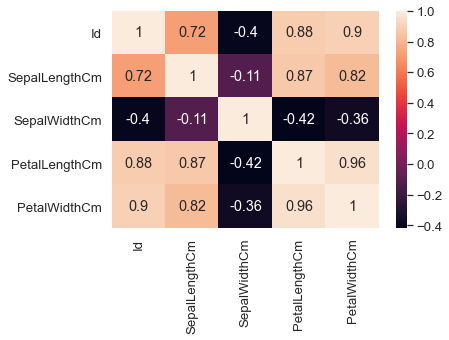

In [17]:
#create a heatmap to demonstrate the correlation magnitude among the variables
corr=dataset.corr().round(2)
sn.set(font_scale=1.2)
sn.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True) 
#annot argument writes the data value into each cell

# Finding the optimal number of clusters 
Use elbow method

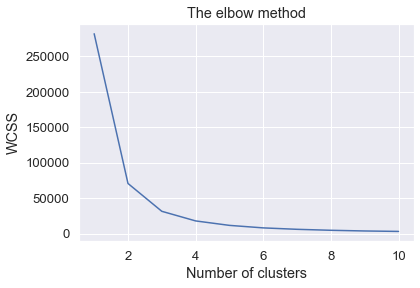

In [34]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


We can see that the distortion/inertia starts decreasing in a linear fashion after point 3, hence it is the elbow and the most optimal value for k. The optimum number of clusters is where the elbow occurs with a shallow slope and 'within cluster sum of squares' (WCSS) doesn't decrease in a pronounced manner with every iteration.

# Training on a Dataset

In [26]:
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300, n_init=10,random_state= 0)  
y_predict= kmeans.fit_predict(x)

In [27]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Kmeans Model clusters data into 3 categorical values

0: Iris-setosa
1: Iris-versicolor
2: Iris-virginica

# Parameter Check

In [22]:
kmeans.cluster_centers_ 

array([[ 25.5  ,   5.006,   3.418,   1.464],
       [125.5  ,   6.588,   2.974,   5.552],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

In [23]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Visualize Clusters on a Graph

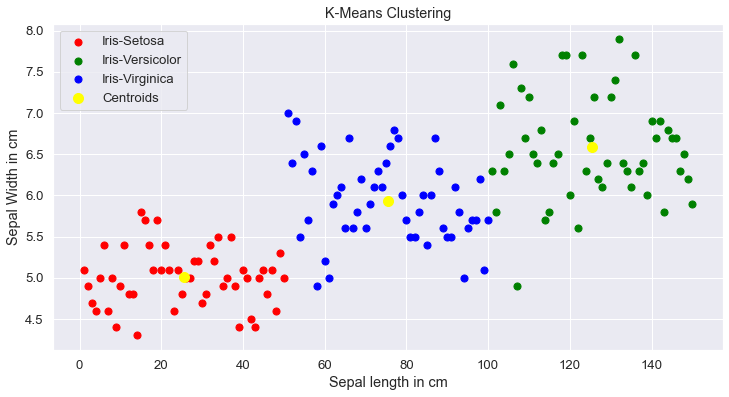

In [31]:
plt.figure(figsize=(12,6))
plt.scatter(x[y_predict==0,0], x[y_predict==0,1], s=50, c='red', label='Iris-Setosa')
plt.scatter(x[y_predict==1,0], x[y_predict==1,1], s=50, c='green', label='Iris-Versicolor')
plt.scatter(x[y_predict==2,0], x[y_predict==2,1], s=50, c='blue', label='Iris-Virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='Centroids')
plt.xlabel('Sepal length in cm')
plt.ylabel('Sepal Width in cm')
plt.title('K-Means Clustering')
plt.legend()
plt.show()